# Neural Network Training Course
- 최상의 신경망 모델을 확보하기 위한 기능
  - validaition loss
  - Mitigating overfitting
  - **`.Dropout()`**
  - **`ModelCheckpoint()`**
  - **`EarlyStopping()`**


### 1. Download to Fashion MNIST Data
- Import `tensorflow`
  - Using `keras`
    - **`keras.datasets._`**
    - **`.load_data()`**

In [ ]:
from tensorflow import keras
(train_input, train_target), (test_input, test_target) =\
  keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


### 2. Create train-set and test-set using `train_test_split()`
- Import `sklearn.model_selection`
  - Using **`train_test_split`**


In [ ]:
from sklearn.model_selection import train_test_split
train_scaled = train_input / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42
)

#checkout
print(train_scaled.shape)
print(val_scaled.shape)

(48000, 28, 28)
(12000, 28, 28)


### 3. Create Multi-layer perceptron Model(DNN)
- Using `.Sequential()`
- Using `.layers.Flatten()`
- Using `layers.Dense()`
- Using **`model_fn(a_layer=None)`**
  - 은닉층 뒤로 또 하나의 계층을 추가할 수 있는 함수
  - 은닉층과 출력층 사이에 새로운 층을 추가할 수 있도록 설계 가능

In [ ]:
#create a model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax"),
])

model.compile(loss="sparse_categorical_crossentropy", metrics="accuracy")
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 6s 2ms/step - loss: 0.5256 - accuracy: 0.8142
Epoch 2/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3923 - accuracy: 0.8600
Epoch 3/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3546 - accuracy: 0.8725
Epoch 4/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3343 - accuracy: 0.8790
Epoch 5/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3210 - accuracy: 0.8872


> <keras.callbacks.History at ..> 구문은 fit() 메소드가 무엇을 반환하고 있음을 알 수 있음

In [ ]:
#create model_fn()
def model_fn(a_layer=None):
  model = keras.Sequential()
  model.add(keras.layers.Flatten(input_shape=(28, 28)))
  model.add(keras.layers.Dense(100, activation="relu"))
  if a_layer:
    model.add(a_layer)
  model.add(keras.layers.Dense(10, activation="softmax"))
  return model

model = model_fn() #request functions

### 4. Using **`summary()`**
- 인공 신경망 모델에 대한 유용한 정보를 제공
  - Model: 모델 이름
  - Layer: 층 이름
  - (type): 층 타입
  - Output Shape: 각 층의 출력 배열 형태
    - None: 배치 차원(어떤 배치 크기에도 대응되도록 None으로 설정)
  - Param #: 모델 파라미터 개수
    - Trainable parameter(학습 파라미터)
    - Non-trainable parameter(학습되지 않는 파라미터)

In [ ]:
#checkout 
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               78500     
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


### 5. Model compile and output to history
- Using **`.compile()`**
- Using `.fit()`
  - **`verbose=_`**: 훈련 출력 과정을 조정
    - `0`일 경우 진행 과정 미출력
    - `1`일 경우 진행 막대와 정보 모두 출력
    - `2`일 경우 정보만 출력
- Using **`.history()`**
  - 히스토리 객체는 딕셔너리가 포함되어 있음
  - **`.keys()`**: 어떤 `key` 값을 가지고 있는지 확인할 수 있음

In [ ]:
model.compile(loss="sparse_categorical_crossentropy", metrics="accuracy")

#create history
history = model.fit(train_scaled, train_target, epochs=5, verbose=0)

#checkout
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


### 6. Visualize the loss of a model
- `.history`
  - `.history[_key]`
- import `matplotlib.pyplot`
  - Using `.plot()`

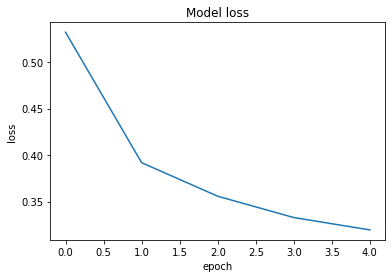

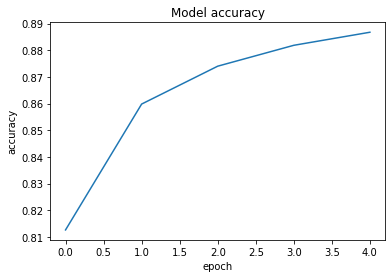

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history["loss"])
plt.title("Model loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

plt.plot(history.history["accuracy"])
plt.title("Model accuracy")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.show()

### 7. Increasing epochs value
- 반복 횟수가 증가함에 따라 손실이 감소하는지 확인 가능

In [ ]:
#increase from 5 epoch to 20
model = model_fn()
model.compile(loss="sparse_categorical_crossentropy", metrics="accuracy")
history = model.fit(train_scaled, train_target, epochs=20, verbose=0)

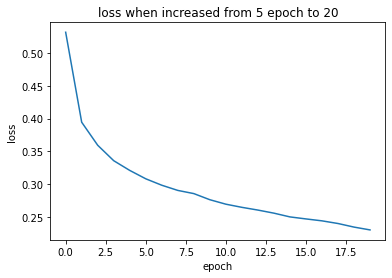

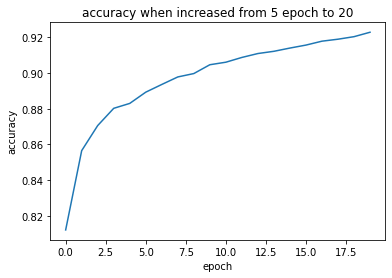

In [ ]:
#checkout
plt.plot(history.history["loss"])
plt.title("loss when increased from 5 epoch to 20")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

plt.plot(history.history["accuracy"])
plt.title("accuracy when increased from 5 epoch to 20")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.show()

> 신경망은 경사 하강법에 따라 훈련되기 때문에 과대적합 또는 과소적합 가능성이 존재함

> 따라서 훈련 세트에 대한 손실과 검증 세트에 대한 손실을 고려해야함 정확도와 손실 감소는 완전히 비례하는 것이 아니기 때문임

### 8. Validation loss
- 모델에 검증 데이터를 전달해 에포크마다 검증 손실 계산 가능
- `validation_data=None`
  - 검증에 사용할 입력과 타겟 값을 튜플로 전달

In [ ]:
model = model_fn()
model.compile(loss="sparse_categorical_crossentropy", metrics="accuracy")
history = model.fit(
    train_scaled, train_target, epochs=20, verbose=0,
    validation_data=(val_scaled, val_target) #forward to tuple
  )

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


> 총 4개의 딕셔너리 `key`를 가지고 있음

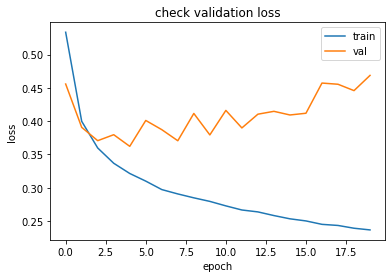

In [ ]:
#checkout
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("check validation loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend(["train", "val"])
plt.show()

> 반복 횟수 5번 이후부터 검증 손실도가 다시 증가하고 있음을 알 수 있음

### 9. Mitigating overfitting
- Using Optimizers
  - 데이터 세트에 적합한 옵티마이저를 사용해 규제의 효과를 얻을 수 있음
  - 과대적합을 일부분 완화 가능

In [ ]:
#adam 옵티마이저가 에포크에 따른 학습률의 크기 조정에 유리
model = model_fn()
#use adam optimizer
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics="accuracy")
history = model.fit(
    train_scaled, train_target, epochs=20, verbose=0,
    validation_data=(val_scaled, val_target)
  )

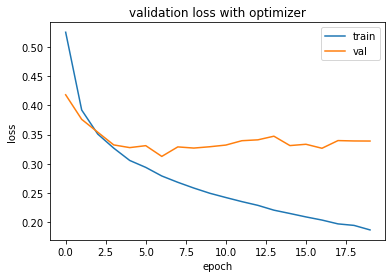

In [ ]:
#checkout
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("validation loss with optimizer")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend(["train", "val"])
plt.show()

> 과대적합이 12.5번 반복 이후 줄어들었다는 것을 알 수 있음

### 10. Dropout
- 특정 은닉층 뒤에 추가해 특정 은닉층의 일부 노드의 출력을 0으로 드롭함
  - 훈련량이 많은 특정 노드를 일부로 제외시켜 다른 노드의 훈련량을 증가 가능
  - 과대적합이 발생되는 것을 방지할 수 있는 것도 장점
- `keras.layers.Dropout(rate_)`
  - `rate_`: 드롭할 노드의 비율 [0,1]

In [ ]:
model = model_fn(keras.layers.Dropout(0.3)) #30% Dropout
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 100)               78500     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense_13 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#graph of results with dropout applied
model = model_fn()
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics="accuracy")
history = model.fit(
    train_scaled, train_target, epochs=20, verbose=0,
    validation_data=(val_scaled, val_target)
  )

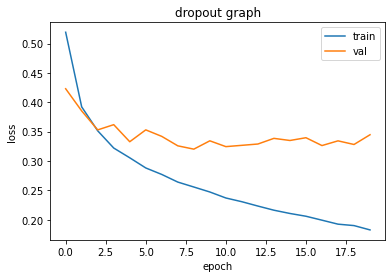

In [ ]:
#visualize 
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("dropout graph")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend(["train", "val"])
plt.show()

### 11. Saving my Best model files
- 최적의 모델을 재사용하도록 유도하기 위해선 모델을 파일로 저장하는 것이 필수
- Using **`.save_weights()`**
  - `.h5`: format HDF5 형식으로 저장
- Using **`.save()`**
  - 모델 구조와 파라미터를 함께 저장 가능
  - `.h5`: format HDF5 형식으로 저장

In [ ]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics="accuracy")
history = model.fit(
    train_scaled, train_target, epochs=10, verbose=0,
    validation_data=(val_scaled, val_target)
  )

In [ ]:
#use .save_weights()
model.save_weights("model-weight.h5")

#use .save()
model.save("model-whole.h5")

In [ ]:
#checkout
!ls -al *.h5

-rw-r--r-- 1 root root 333448 Nov 10 14:41 model-weight.h5
-rw-r--r-- 1 root root 982664 Nov 10 14:41 model-whole.h5


> 파일이 정상적으로 저장되었는지 일시적으로 확인하기 위한 명령어

### 12. Load to my Best model files
- 저장한 모델을 다시 불러오기
- Using **`.load_weights()`**
  - **`.save_weights()`**와 쌍을 이루고 있음
  - 저장할 때 사용하면, 불러올 때도 `.load_weights()`사용해야함
- Using **`.load_model()`**
  - **`.save()`**와 쌍을 이루고 있음
  - 모델 구조나 파라미터를 모두 가지고 있는 파일일때 같이 사용해야함

In [ ]:
#load_weights()
model = model_fn(keras.layers.Dropout(0.3))
model.load_weights("model-weight.h5")

import numpy as np
val_labels = np.argmax(model.predict(val_scaled), axis=1)
print(np.mean(val_labels == val_target))

375/375 [==============================] - 1s 1ms/step
0.8836666666666667


In [ ]:
#checkout
print(val_labels[:20])
print(val_target[:20])

[8 8 7 4 8 4 1 0 4 5 6 7 3 9 4 1 1 3 3 9]
[8 8 7 4 8 4 1 0 4 5 3 7 4 9 4 1 1 3 3 9]


In [ ]:
#load_model()
model = keras.models.load_model("model-whole.h5")

model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3235 - accuracy: 0.8837


[0.3235417306423187, 0.8836666941642761]

### 13. Callback
- 훈련 과정 중간에 어떤 작업을 수행할 수 있게 하는 객체
- `keras.callbacks`
   - Using **`.ModelCheckpoint()`**
    - 에포크 마다 모델을 저장하는데 가장 낮은 검증 점수 모델을 자동 저장
   - Using **`.EarlyStopping()`**
    - 과대적합이 시작되기 직전에 훈련을 미리 종료

In [ ]:
#create model
model = model_fn(keras.layers.Dropout(0.3))
model.compile(
    optimizer="adam", loss="sparse_categorical_crossentropy", metrics="accuracy"
)

#create a checkPoint
checkPoint = keras.callbacks.ModelCheckpoint(
    "best-model.h5", save_best_only=True
)

model.fit(
    train_scaled, train_target, epochs=20, verbose=0,
    validation_data=(val_scaled, val_target),
    callbacks=[checkPoint]
)


In [ ]:
#predict
model = keras.models.load_model("best-model.h5")

model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3151 - accuracy: 0.8889


[0.31510475277900696, 0.8889166712760925]

### 13. Early stopping point
- Overfitting 발생 전에 훈련을 조기에 중지하는 것
- Using **`.EarlyStopping()`**
  - `patience=_Integer`: 검증 점수가 연속적으로 증가하지 않으면 훈련 중지
  - `restore_best_weights=_Boolean`: 가장 좋은 모델로 복원

In [ ]:
#create a model
model = model_fn(keras.layers.Dropout(0.3))
model.compile(
    optimizer="adam", loss="sparse_categorical_crossentropy", metrics="accuracy"
)

#checkPoint
checkPoint = keras.callbacks.ModelCheckpoint(
    "best-model.h5", save_best_only=True
)

#earlyStopping
earlyStopping = keras.callbacks.EarlyStopping(
    patience=2,
    restore_best_weights=True
)

model.fit(
    train_scaled, train_target, epochs=20, verbose=0,
    validation_data=(val_scaled, val_target),
    callbacks=[checkPoint]
)

In [ ]:
#predict
model = keras.models.load_model("best-model.h5")

model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3171 - accuracy: 0.8876


[0.3170846402645111, 0.887583315372467]

In [ ]:
#stopped epochs
print(earlyStopping.stopped_epoch)

0


> 수치 및 결과는 모델에 따라 다르게 나올 수 있음